# 📊 Exploratory Data Analysis (EDA) on Netflix Movies
### Analyzing movie durations and short action movies from the 1990s
This analysis aims to:
- Find the most frequent movie duration in the 1990s.
- Count the number of short action movies (<90 minutes) from the same period.


#### 1. Import libraries that are needed

In [5]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


#### 2. Load and explore the data

In [20]:
# Load  the dataset
netflix_df = pd.read_csv(r"C:\Users\ADMIN\Downloads\netflix_data.csv")

# Display basic information about the dataset
netflix_df.info()

# Show the first few rows
netflix_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


#### 3. Filter movies from the 1990's

In [24]:
# Convert 'release_year' to numeric and filter for movies from the 1990s
netflix_df["release_year"] = pd.to_numeric(netflix_df["release_year"], errors="coerce")

# Subset to keep only movies released in the 1990s
movies_90s = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["release_year"].between(1990, 1999))]

# Display the first few rows of the filtered dataset
movies_90s.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


#### 4. Handling missing values

In [33]:
# Check for missing values in each column
missing_values = movies_90s.isnull().sum()
print("Missing Values Before Dropping:\n", missing_values)


Missing Values Before Dropping:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


In [35]:
# Drop rows where 'duration' is missing
movies_90s = movies_90s.dropna(subset=["duration"])

# Check missing values again after dropping
missing_values_after = movies_90s.isnull().sum()
print("Missing Values After Dropping:\n", missing_values_after)


Missing Values After Dropping:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64


#### 5. Find the most frequent movie duration

In [38]:
# Find the most frequent movie duration (mode)
if not movies_90s["duration"].mode().empty:
    duration = movies_90s["duration"].mode()[0]
    print("Most Frequent Movie Duration:", duration)
else:
    print("No mode found for movie durations.")


Most Frequent Movie Duration: 94


#### 6. Visualize the movie durations using histogram

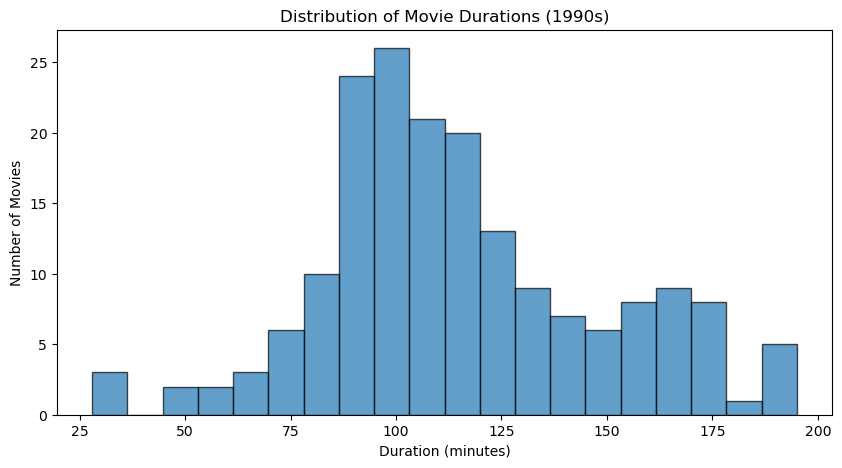

In [47]:
# Plot the distribution of movie durations
plt.figure(figsize=(10, 5))
plt.hist(movies_90s["duration"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movie Durations (1990s)")
plt.grid(False)
plt.show()


#### 7. Count short action movies

In [44]:
# Filter only Action movies
action_movies_90s = movies_90s[movies_90s["genre"].str.contains("Action", case=False, na=False)]

# Count short action movies (<90 minutes)
short_movie_count = action_movies_90s[action_movies_90s["duration"] < 90].shape[0]

print("Number of Short Action Movies in the 1990s:", short_movie_count)


Number of Short Action Movies in the 1990s: 7


## 📌 Key Findings

1️⃣ The most frequent movie duration in the 1990s was 94 minutes  
2️⃣ The number of short action movies (<90 min) in the 1990s was 7.  
📊 These insights help us understand the typical movie duration and trends in action films.
